In [1]:
import pandas as pd

In [2]:
load_dataset = pd.read_excel("OL_ST_R_Sheet_Extraction.xlsx")

In [3]:
load_dataset.head()

,No,Drug Name,Unit,Tablet per box,Early stock,Purchasing,Usage (years),Usage (months),Usage (days),Purchasing base price,...,Usage (month),expired date,Category,Number of expired drugs,Opportunity lost from expired drugs,Opportunity Lost of capital cost from return drugs,Unnamed: 20,Unnamed: 21,Unnamed: 22,Opportunity Lost from failed returned expired drugs
0,1,Ab Vask 5 Mg,Tablet,30,144,1800,367,30.583333,1.005479,5225,...,48.564033,2017-08-31 00:00:00,Expired,899.0,1174318.75,117431.875,29.966667,29.0,29.0,151525.0
1,2,Acarbose 100 Mg,Tablet,100,0,32500,19670,1639.166667,53.890411,990,...,4.827148,2016-09-30 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Adalat Oros 30 Mg,Tablet,30,0,6300,4598,383.166667,12.597260,3830,...,1.441931,2017-05-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,Albuman 20% 100 Ml,Botol,1,18,90,61,5.083333,0.167123,749925,...,6.245902,2017-11-03 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,Alinamin Inj,Ampul,5,106,1000,748,62.333333,2.049315,13475,...,2.743316,2016-05-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
load_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 24 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   No                                                    97 non-null     int64  
 1   Drug Name                                             97 non-null     object 
 2   Unit                                                  97 non-null     object 
 3   Tablet per box                                        97 non-null     int64  
 4   Early stock                                           97 non-null     int64  
 5   Purchasing                                            97 non-null     int64  
 6   Usage (years)                                         97 non-null     int64  
 7   Usage (months)                                        97 non-null     float64
 8   Usage (days)                                          97 non-n

In [5]:
load_dataset = load_dataset.loc[:, ~load_dataset.columns.str.contains('^Unnamed')]
load_dataset.dropna(axis=1, how='all', inplace=True)

In [6]:
print("Missing values per column:")
print(load_dataset.isnull().sum())

Missing values per column:
No                                                       0
Drug Name                                                0
Unit                                                     0
Tablet per box                                           0
Early stock                                              0
Purchasing                                               0
Usage (years)                                            0
Usage (months)                                           0
Usage (days)                                             0
Purchasing base price                                    0
Safety Stock                                             0
Left Stock                                               0
Total of Stagnant Drugs                                  0
Opportunity Lost of Capital Purchasing Cost              0
Usage (month)                                            0
expired date                                             0
Category                     

In [7]:
load_dataset.dropna(subset=['Purchasing', 'Usage (month)', 'Left Stock'], inplace=True)

load_dataset.fillna(0, inplace=True)

In [8]:
load_dataset = load_dataset.drop(columns=['No'])

In [9]:
print("Number of duplicate rows:", load_dataset.duplicated().sum())

load_dataset.drop_duplicates(inplace=True)

Number of duplicate rows: 0


In [10]:
load_dataset['expired date'] = pd.to_datetime(load_dataset['expired date'],dayfirst=True,errors='coerce')

In [11]:
import numpy as np

In [12]:
load_dataset['months_until_stockout'] = load_dataset['Left Stock'] / load_dataset['Usage (month)'].replace(0, np.nan)

if 'Left Stock' in load_dataset.columns and 'Safety Stock' in load_dataset.columns:
    load_dataset['Stock_Risk_Flag'] = (load_dataset['Left Stock'] < load_dataset['Safety Stock']).astype(int)

load_dataset['expiry_loss_flag'] = load_dataset['Opportunity lost from expired drugs'].fillna(0).apply(lambda x: 1 if x > 0 else 0)

In [13]:
load_dataset.fillna(0, inplace=True)

C:\Users\User\AppData\Local\Temp\ipykernel_27916\1799080028.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0' has dtype incompatible with datetime64[ns], please explicitly cast to a compatible dtype first.
  load_dataset.fillna(0, inplace=True)


In [14]:
load_dataset.head()

,Drug Name,Unit,Tablet per box,Early stock,Purchasing,Usage (years),Usage (months),Usage (days),Purchasing base price,Safety Stock,...,Usage (month),expired date,Category,Number of expired drugs,Opportunity lost from expired drugs,Opportunity Lost of capital cost from return drugs,Opportunity Lost from failed returned expired drugs,months_until_stockout,Stock_Risk_Flag,expiry_loss_flag
0,Ab Vask 5 Mg,Tablet,30,144,1800,367,30.583333,1.005479,5225,2.010959,...,48.564033,2017-08-31 00:00:00,Expired,899.0,1174318.75,117431.875,151525.0,32.472592,0,1
1,Acarbose 100 Mg,Tablet,100,0,32500,19670,1639.166667,53.890411,990,107.780822,...,4.827148,2016-09-30 00:00:00,0,0.0,0.00,0.000,0.0,2657.884150,0,0
2,Adalat Oros 30 Mg,Tablet,30,0,6300,4598,383.166667,12.597260,3830,25.194521,...,1.441931,2017-05-31 00:00:00,0,0.0,0.00,0.000,0.0,1180.361388,0,0
3,Albuman 20% 100 Ml,Botol,1,18,90,61,5.083333,0.167123,749925,0.334247,...,6.245902,2017-11-03 00:00:00,0,0.0,0.00,0.000,0.0,7.524934,0,0
4,Alinamin Inj,Ampul,5,106,1000,748,62.333333,2.049315,13475,4.098630,...,2.743316,2016-05-31 00:00:00,0,0.0,0.00,0.000,0.0,130.499025,0,0


In [15]:
load_dataset.to_excel("Pre-ProcessedbeforeScalingandEncoding_OL_ST_R.xlsx", index=False)

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

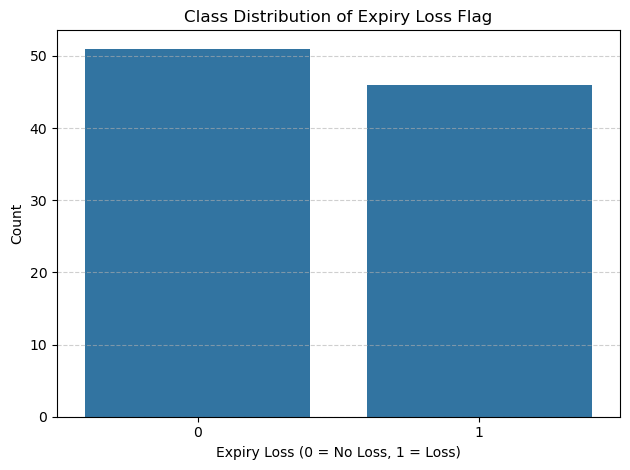

In [17]:
sns.countplot(data=load_dataset, x='expiry_loss_flag')
plt.title("Class Distribution of Expiry Loss Flag")
plt.xlabel("Expiry Loss (0 = No Loss, 1 = Loss)")
plt.ylabel("Count")
plt.grid(True, axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

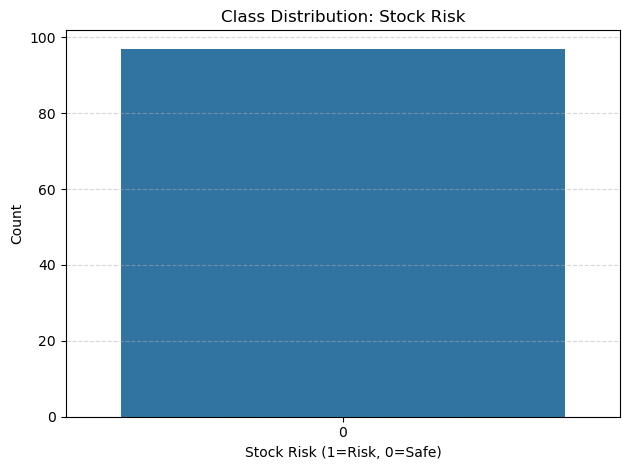

In [18]:
sns.countplot(x='Stock_Risk_Flag', data=load_dataset)
plt.title("Class Distribution: Stock Risk")
plt.xlabel("Stock Risk (1=Risk, 0=Safe)")
plt.ylabel("Count")
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [19]:
load_dataset.describe()

,Tablet per box,Early stock,Purchasing,Usage (years),Usage (months),Usage (days),Purchasing base price,Safety Stock,Left Stock,Total of Stagnant Drugs,Opportunity Lost of Capital Purchasing Cost,Usage (month),Number of expired drugs,Opportunity lost from expired drugs,Opportunity Lost of capital cost from return drugs,Opportunity Lost from failed returned expired drugs,months_until_stockout,Stock_Risk_Flag,expiry_loss_flag
count,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,9.700000e+01,97.000000,97.000000,9.700000e+01,9.700000e+01,97.000000,97.000000,97.0,97.000000
mean,28.742268,1248.731959,8587.659794,4420.989691,368.415808,12.112301,38841.154639,28.164807,5415.402062,4310.154639,2.066477e+06,30.816879,2325.103093,2.792835e+06,2.792835e+05,24535.237113,1059.123714,0.0,0.474227
std,36.211842,2641.186569,16685.395815,11261.813880,938.484490,30.854285,87069.697967,66.489964,9532.878186,8417.328849,6.523729e+06,41.150949,6615.633275,6.421997e+06,6.421997e+05,66608.269303,3113.792244,0.0,0.501929
min,1.000000,0.000000,0.000000,10.000000,0.833333,0.027397,218.000000,0.054795,47.000000,24.500000,1.055006e+03,0.263488,0.000000,0.000000e+00,0.000000e+00,0.000000,0.846154,0.0,0.000000
25%,1.000000,0.000000,435.000000,196.000000,16.333333,0.536986,2618.000000,1.210959,346.000000,235.000000,2.557079e+04,3.701299,0.000000,0.000000e+00,0.000000e+00,0.000000,23.235088,0.0,0.000000
50%,5.000000,63.000000,2300.000000,804.000000,67.000000,2.202740,8151.000000,4.438356,1577.000000,775.000000,2.637285e+05,12.881041,0.000000,0.000000e+00,0.000000e+00,0.000000,81.341772,0.0,0.000000
75%,30.000000,1005.000000,9100.000000,4592.000000,382.666667,12.580822,53902.000000,25.161644,6000.000000,4611.750000,1.207770e+06,39.166667,726.000000,2.484090e+06,2.484090e+05,1101.000000,600.091724,0.0,1.000000
max,100.000000,12600.000000,130000.000000,102422.000000,8535.166667,280.608219,749925.000000,561.216438,47740.000000,46050.000000,5.644308e+07,195.000000,34983.000000,4.461540e+07,4.461540e+06,438000.000000,23532.401876,0.0,1.000000


In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

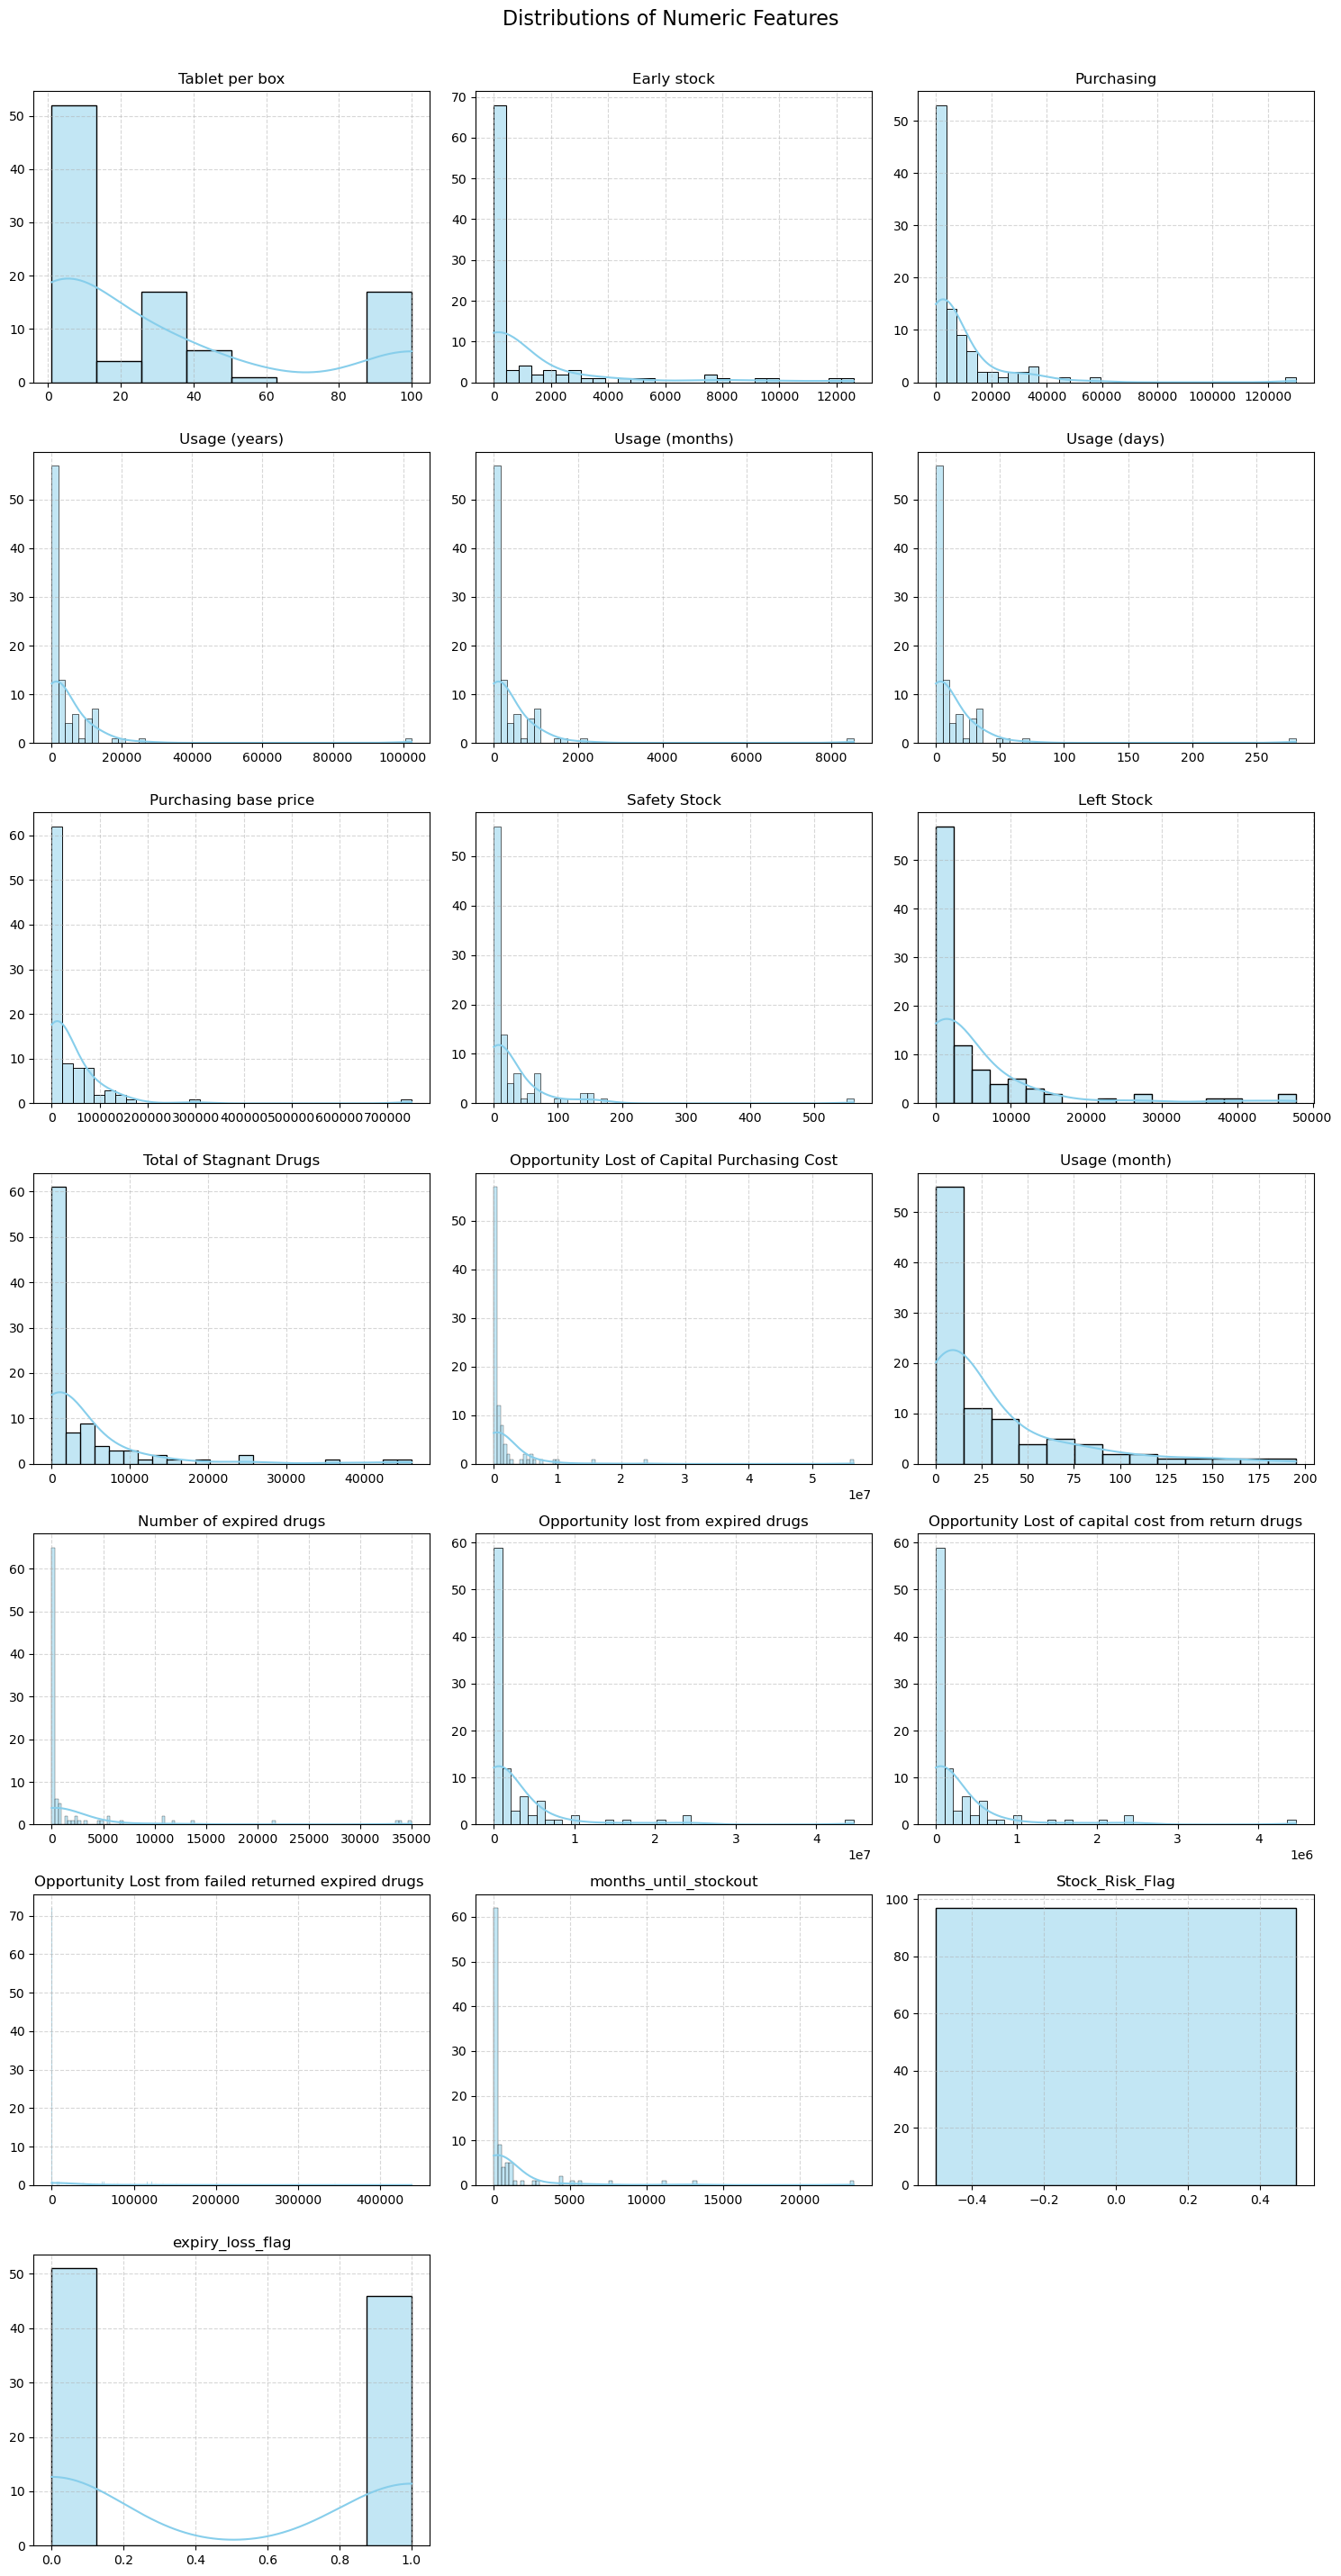

In [21]:
numeric_cols = load_dataset.select_dtypes(include=['float64', 'int64']).columns
num_cols = len(numeric_cols)
cols = 3 
rows = math.ceil(num_cols / cols)
plt.figure(figsize=(cols * 5, rows * 4))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(rows, cols, i)
    sns.histplot(load_dataset[col], kde=True, color='skyblue')
    plt.title(f'{col}')
    plt.xlabel('')
    plt.ylabel('')
    plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.suptitle('Distributions of Numeric Features', fontsize=16, y=1.02)
plt.show()

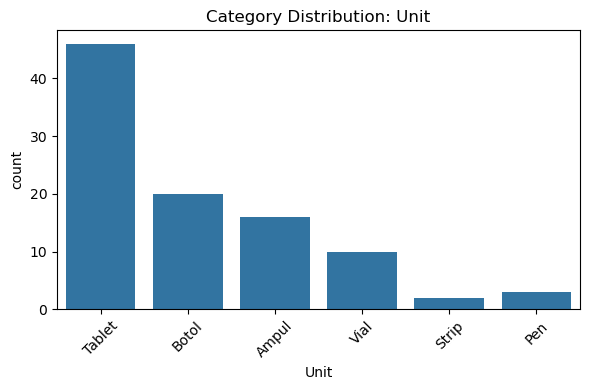

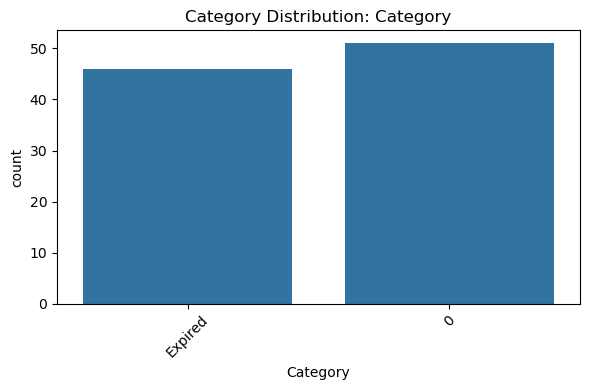

In [22]:
categorical_cols = load_dataset.select_dtypes(include=['object']).columns
for col in categorical_cols:
    if load_dataset[col].nunique() < 50:  
        plt.figure(figsize=(6, 4))
        sns.countplot(data=load_dataset, x=col)
        plt.title(f'Category Distribution: {col}')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

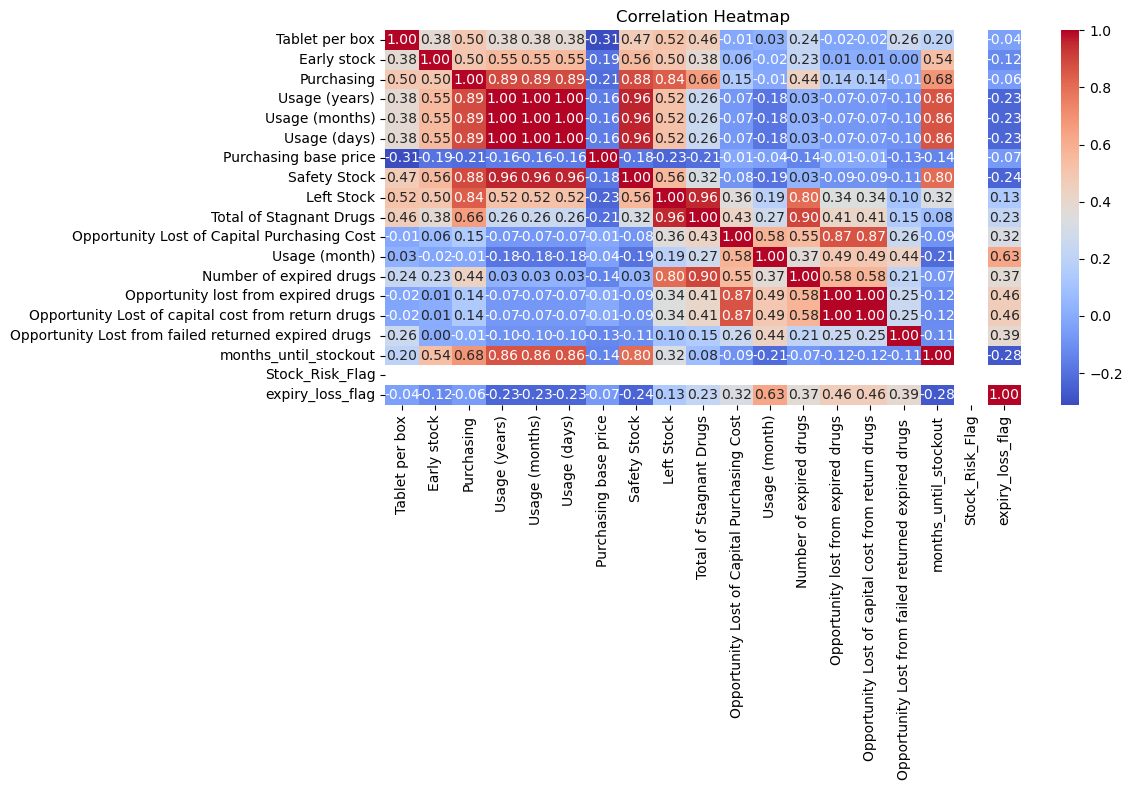

In [23]:
plt.figure(figsize=(12, 8))
sns.heatmap(load_dataset[numeric_cols].corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

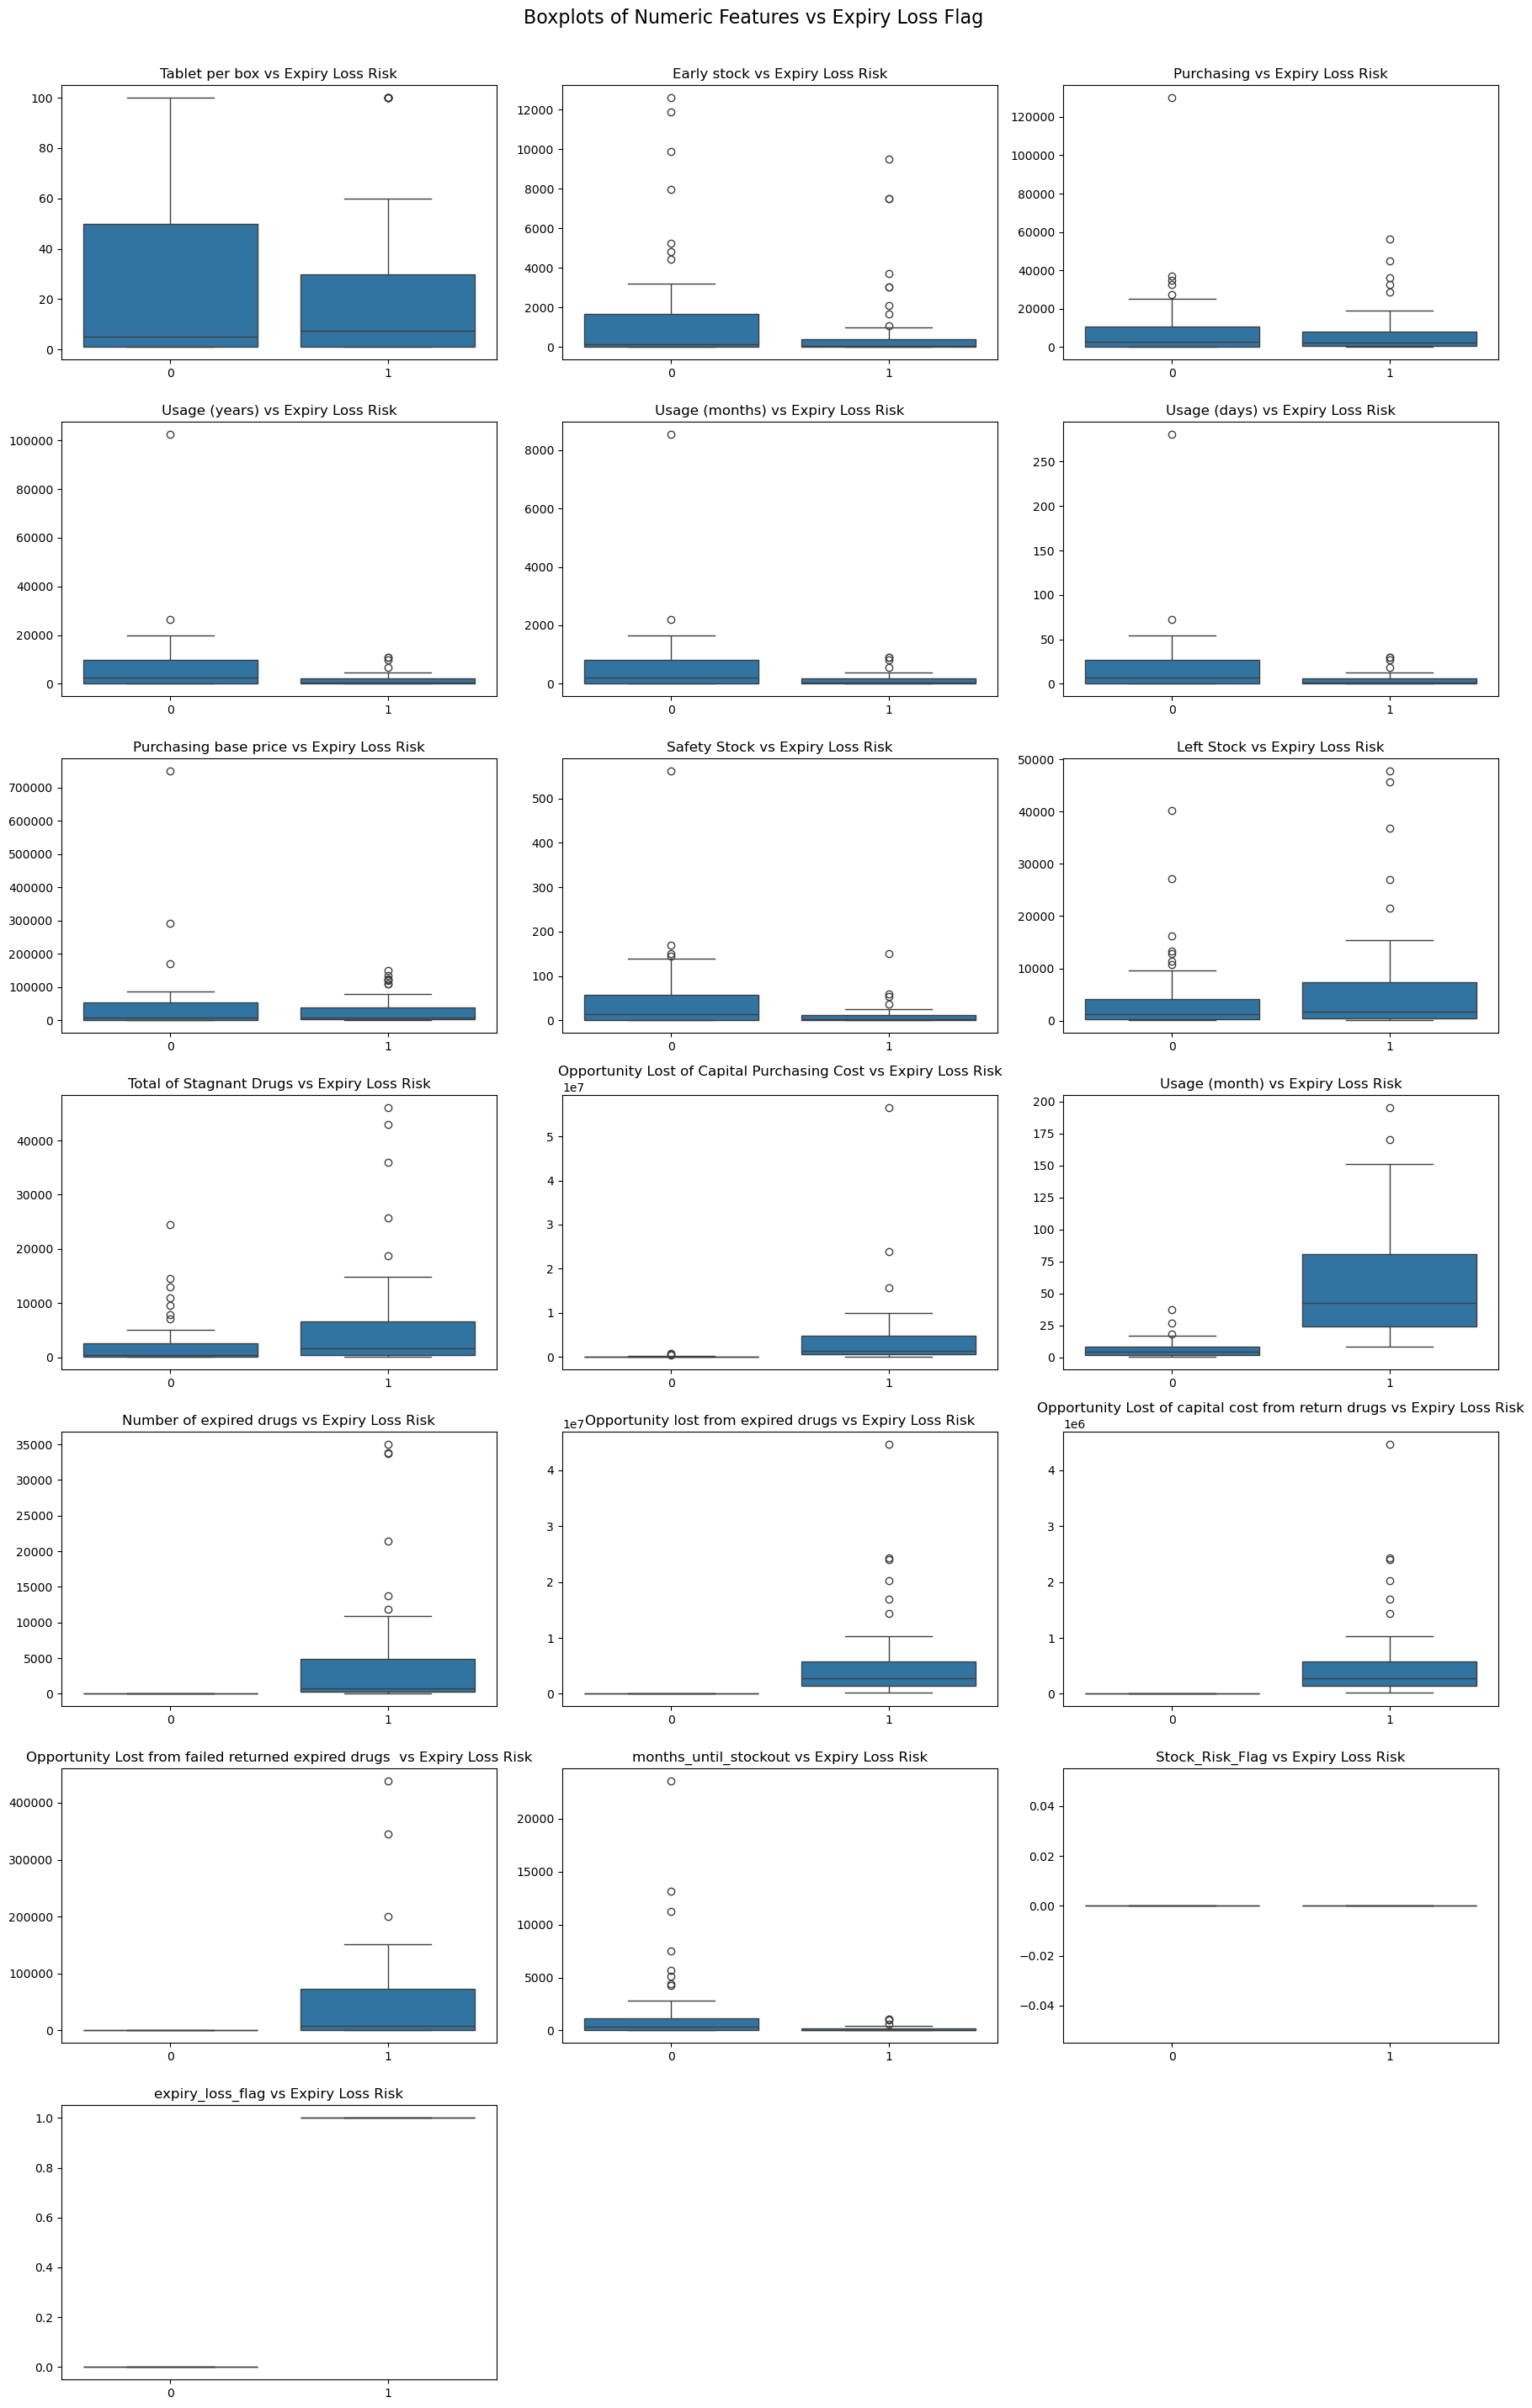

In [24]:
numeric_cols = load_dataset.select_dtypes(include=['float64', 'int64']).columns
num_cols = len(numeric_cols)
cols = 3  
rows = math.ceil(num_cols / cols)
fig, axes = plt.subplots(rows, cols, figsize=(cols * 6, rows * 4))
axes = axes.flatten()
for i, col in enumerate(numeric_cols):
    sns.boxplot(x='expiry_loss_flag', y=col, data=load_dataset, ax=axes[i])
    axes[i].set_title(f'{col} vs Expiry Loss Risk')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])
plt.tight_layout()
plt.suptitle("Boxplots of Numeric Features vs Expiry Loss Flag", fontsize=16, y=1.02)
plt.show()

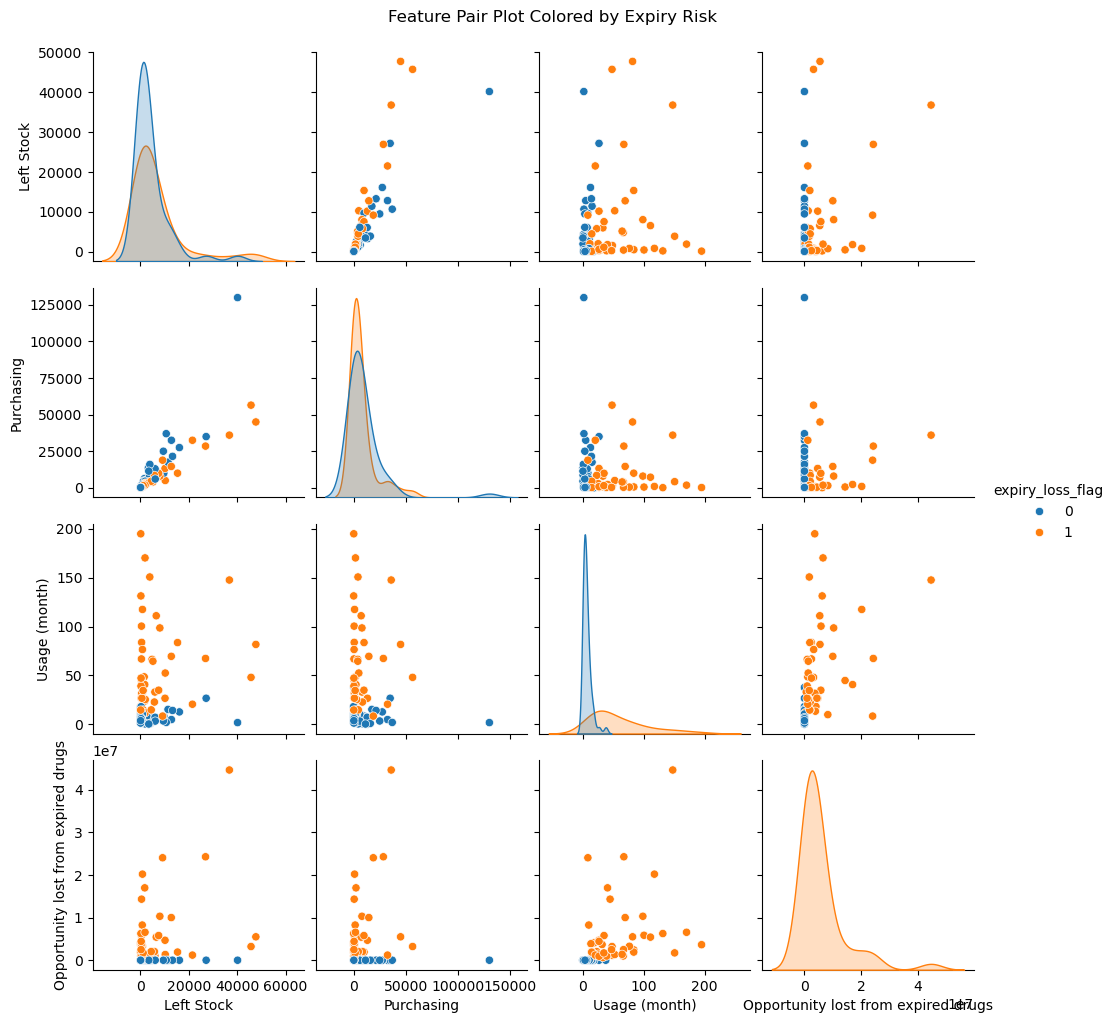

In [25]:
sns.pairplot(load_dataset, vars=['Left Stock', 'Purchasing', 'Usage (month)', 'Opportunity lost from expired drugs'], hue='expiry_loss_flag')
plt.suptitle("Feature Pair Plot Colored by Expiry Risk", y=1.02)
plt.show()

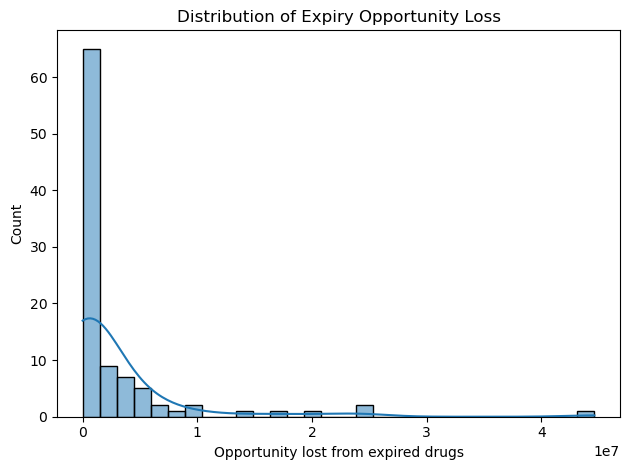

In [26]:
sns.histplot(load_dataset['Opportunity lost from expired drugs'], bins=30, kde=True)
plt.title("Distribution of Expiry Opportunity Loss")
plt.tight_layout()
plt.show()

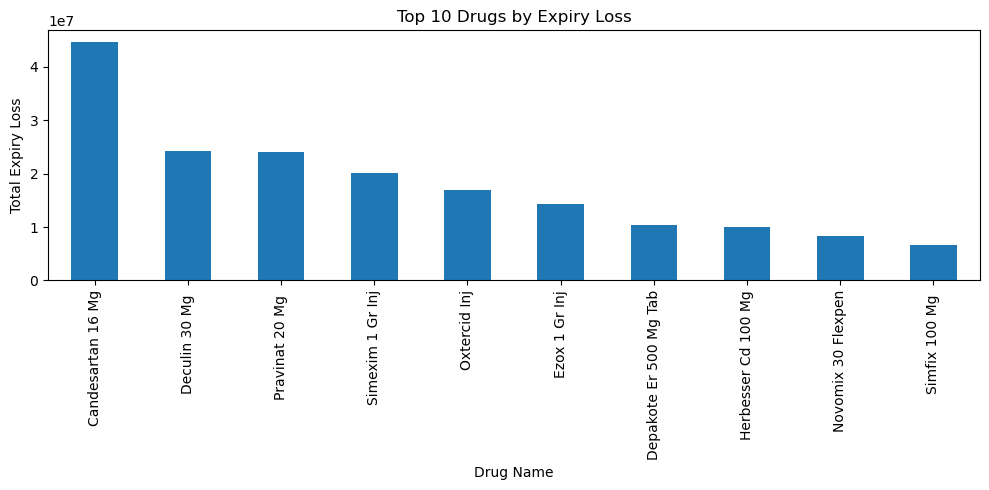

In [27]:
top_loss = load_dataset.groupby('Drug Name')['Opportunity lost from expired drugs'].sum().sort_values(ascending=False).head(10)
top_loss.plot(kind='bar', figsize=(10,5), title="Top 10 Drugs by Expiry Loss")
plt.ylabel("Total Expiry Loss")
plt.tight_layout()
plt.show()